<a href="https://colab.research.google.com/github/Nildk123/Deeplearning/blob/master/Week3/Copy_of_Copy_of_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler

from keras.optimizers import Adam, SGD

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


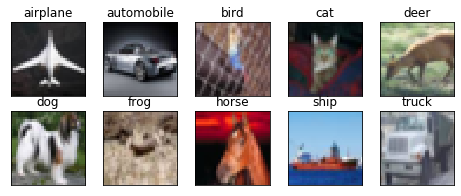

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 18s 47ms/step - loss: 1.8710 - acc: 0.2787 - val_loss: 1.4882 - val_acc: 0.4452
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.3878 - acc: 0.4946 - val_loss: 1.1687 - val_acc: 0.5779
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1547 - acc: 0.5905 - val_loss: 1.0220 - val_acc: 0.6397
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 1.0181 - acc: 0.6430 - val_loss: 0.8617 - val_acc: 0.7003
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8959 - acc: 0.6879 - val_loss: 0.7914 - val_acc: 0.7253
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8352 - acc: 0.7116 - val_loss: 0.8944 - val_acc: 0.6986
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7868 - acc: 0.7314 - val_loss: 0.7454 - val_acc: 0.7425
Epoch 8/50
390/390 [==============================] - 9s 23m

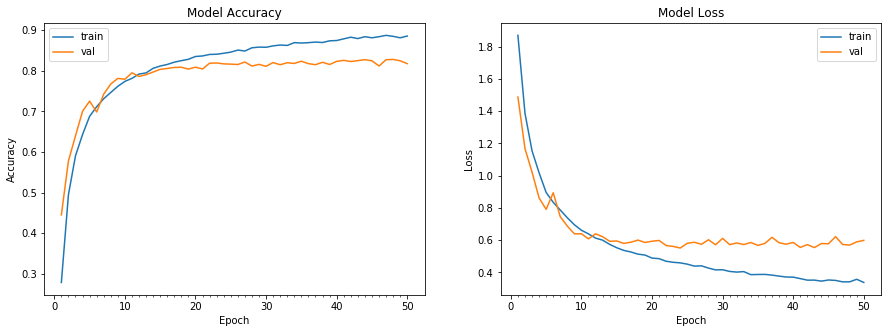

Accuracy on test data is: 81.76


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Selected Benchmark - 81.76

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3), activation= 'relu'))  #(32*32*3)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3, activation= 'relu')) #(30*30*48)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #(15*15*96)
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Convolution2D(32, 1, 1, activation= 'relu')) #(15*15*32)
#model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3, activation= 'relu')) #(13*13*96)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3, activation= 'relu')) #(11*11*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #(5*5*128)
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Convolution2D(32, 1, 1, activation= 'relu')) #(5*5*32)
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3, activation= 'relu')) #(3*3*192)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))

#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 96)        41568     
_________________________________________________________________
batch_normalization_38 (Batc (None, 30, 30, 96)        384       
_________________________________________________________________
dropout_27 (Dropout)         (None, 30, 30, 96)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 96)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


ValueError: ignored

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters= 48, kernel_size= (3,3), input_shape = (32, 32, 3), activation= 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #(15*15*96)
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(SeparableConv2D(filters= 32, kernel_size= (1,1), activation= 'relu', use_bias= False))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False))
#model.add(Convolution2D(64, 3, 3, activation= 'relu')) #(13*13*96)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False))
#model.add(Convolution2D(128, 3, 3, activation= 'relu')) #(11*11*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #(5*5*128)
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(SeparableConv2D(filters= 32, kernel_size= (1,1), activation= 'relu', use_bias= False))
#model.add(Convolution2D(32, 1, 1, activation= 'relu')) #(5*5*32)
model.add(BatchNormalization())

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False))
#model.add(Convolution2D(64, 3, 3, activation= 'relu')) #(3*3*192)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))

#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), input_shape = (32, 32, 3), padding= 'same', activation= 'relu', use_bias= False)) #(30*30*32)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False))  #30(28*28*64)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False))  #28(26*26*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 256, kernel_size= (3,3), activation= 'relu', use_bias= False))  #(26*26*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #(13*13*128)
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(SeparableConv2D(filters= 32, kernel_size= (1,1), activation= 'relu', use_bias= False)) #(13*13*128)
model.add(BatchNormalization())

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False)) #(11*11*256)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False)) #(9*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #(4*4*512)
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(SeparableConv2D(filters= 32, kernel_size= (1,1), activation= 'relu', use_bias= False)) #(4*4*64)
model.add(BatchNormalization())


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_8 (Separabl (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_9 (Separabl (None, 30, 30, 64)        2336      
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_10 (Separab (None, 28, 28, 128)      

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  del sys.path[0]




Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 40s 103ms/step - loss: 1.6318 - acc: 0.4178 - val_loss: 1.3730 - val_acc: 0.5096
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 34s 86ms/step - loss: 1.2674 - acc: 0.5613 - val_loss: 1.1795 - val_acc: 0.5877
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 34s 87ms/step - loss: 1.0952 - acc: 0.6196 - val_loss: 0.9500 - val_acc: 0.6701
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 33s 86ms/step - loss: 1.0014 - acc: 0.6528 - val_loss: 0.9377 - val_acc: 0.6780
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 34s 86ms/step - loss: 0.9325 - acc: 0.6

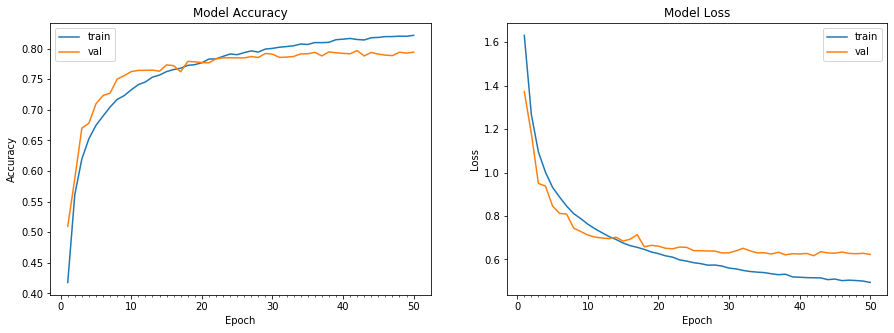

Accuracy on test data is: 79.41


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), input_shape = (32, 32, 3), padding= 'same', activation= 'relu', use_bias= False)) #32(30*30*32)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), activation= 'relu', use_bias= False))  #30(28*28*64)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  #30(26*26*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False))  #28(26*26*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False, strides=(2,2)))  #13(26*26*128)
#model.add(MaxPooling2D(pool_size=(2, 2))) #(13*13*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False)) #11(11*11*256)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False)) #9(9*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same')) #9(7*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, strides=(2,2)))  #4(26*26*128)
#model.add(MaxPooling2D(pool_size=(2, 2))) #(13*13*128)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same')) #4(7*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters= 10, kernel_size= (1,1), activation= 'relu', use_bias= False)) #(3*9*512)

model.add(GlobalAveragePooling2D()) 
model.add(Activation('softmax'))

# Compile the model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_138 (Separa (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_131 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_116 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_139 (Separa (None, 30, 30, 32)        1312      
_________________________________________________________________
batch_normalization_132 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_117 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_140 (Separa (None, 30, 30, 64)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 37s 94ms/step - loss: 1.4376 - acc: 0.4803 - val_loss: 1.6282 - val_acc: 0.5428
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 25s 65ms/step - loss: 1.0269 - acc: 0.6368 - val_loss: 1.1195 - val_acc: 0.6260
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 25s 65ms/step - loss: 0.8712 - acc: 0.6898 - val_loss: 0.8453 - val_acc: 0.7088
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 26s 66ms/step - loss: 0.7714 - acc: 0.7299 - val_loss: 0.7719 - val_acc: 0.7366
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 26s 65ms/step - loss: 0.6928 - acc: 0.7561

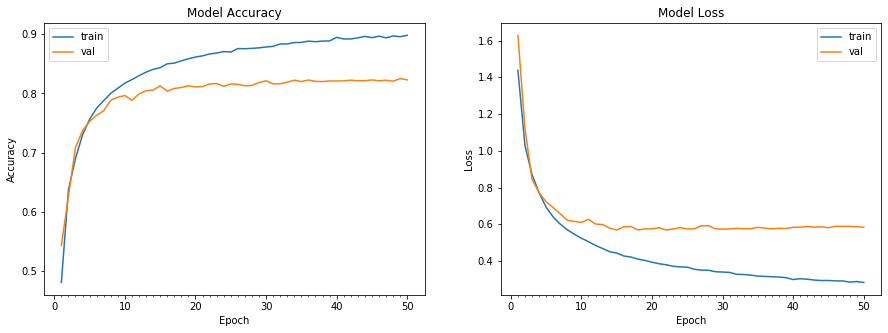

Accuracy on test data is: 82.28


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), input_shape = (32, 32, 3), padding= 'same', activation= 'relu', use_bias= False)) 
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  #30(28*28*64)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), activation= 'relu', use_bias= False))  #30(28*28*64)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  #30(26*26*128)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False))  #28(26*26*128)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False, strides=(2,2)))  #13(26*26*128)
#model.add(MaxPooling2D(pool_size=(2, 2))) #(13*13*128)
model.add(BatchNormalization())
model.add(Dropout(0.05))

#model.add(SeparableConv2D(filters= 32, kernel_size= (1,1), activation= 'relu', use_bias= False)) #(13*13*128)
#model.add(BatchNormalization())

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False)) #11(11*11*256)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False)) #9(9*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same')) #9(7*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, strides=(2,2)))  #4(26*26*128)
#model.add(MaxPooling2D(pool_size=(2, 2))) #(13*13*128)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same')) #4(7*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 10, kernel_size= (1,1), activation= 'relu', use_bias= False)) #(3*9*512)
model.add(BatchNormalization())
model.add(Dropout(0.05))

#model.add(Convolution2D(10, 4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(GlobalAveragePooling2D()) 
#model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_162 (Separa (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_153 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_138 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_163 (Separa (None, 32, 32, 32)        1312      
_________________________________________________________________
batch_normalization_154 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_139 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_164 (Separa (None, 32, 32, 32)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 40s 102ms/step - loss: 1.5180 - acc: 0.4594 - val_loss: 1.8924 - val_acc: 0.4744
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 28s 71ms/step - loss: 1.0791 - acc: 0.6281 - val_loss: 1.0911 - val_acc: 0.6327
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 28s 72ms/step - loss: 0.8900 - acc: 0.6954 - val_loss: 0.9113 - val_acc: 0.6915
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 28s 71ms/step - loss: 0.7782 - acc: 0.7323 - val_loss: 0.8950 - val_acc: 0.6986
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 28s 71ms/step - loss: 0.6967 - acc: 0.762

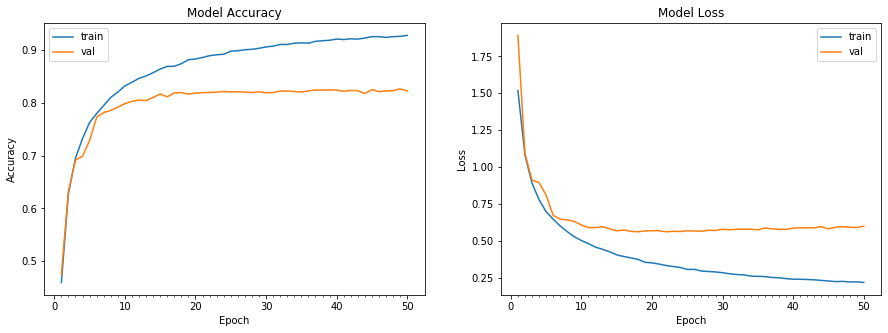

Accuracy on test data is: 82.27


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Final Submission File

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), input_shape = (32, 32, 3), padding= 'same', activation= 'relu', use_bias= False)) #(32*32*32)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  #(32*32*32)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  #(32*32*32)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 32, kernel_size= (3,3), activation= 'relu', use_bias= False))  #(30*30*32)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  #(30*30*64)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same'))  #(30*30*64)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 64, kernel_size= (3,3), activation= 'relu', use_bias= False))  #(28*28*64)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False, strides=(2,2)))  #(13*13*96)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False)) #(11*11*96)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 96, kernel_size= (3,3), activation= 'relu', use_bias= False)) #(9*9*96)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same')) #(9*9*128)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, strides=(2,2)))  #(4*4*128)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 128, kernel_size= (3,3), activation= 'relu', use_bias= False, padding= 'same')) #(4*4*128)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(filters= 10, kernel_size= (1,1), activation= 'relu', use_bias= False)) #(4*4*10)
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(GlobalAveragePooling2D()) 
model.add(Activation('softmax'))

# Compile the model
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_216 (Separa (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_207 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_192 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_217 (Separa (None, 32, 32, 32)        1312      
_________________________________________________________________
batch_normalization_208 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_193 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_218 (Separa (None, 32, 32, 32)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 46s 119ms/step - loss: 1.4890 - acc: 0.4695 - val_loss: 1.9512 - val_acc: 0.4677
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 30s 76ms/step - loss: 1.0232 - acc: 0.6475 - val_loss: 1.1181 - val_acc: 0.6362
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 30s 76ms/step - loss: 0.8345 - acc: 0.7153 - val_loss: 0.8689 - val_acc: 0.7059
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 30s 76ms/step - loss: 0.7229 - acc: 0.7541 - val_loss: 0.7697 - val_acc: 0.7428
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 30s 76ms/step - loss: 0.6557 - acc: 0.778

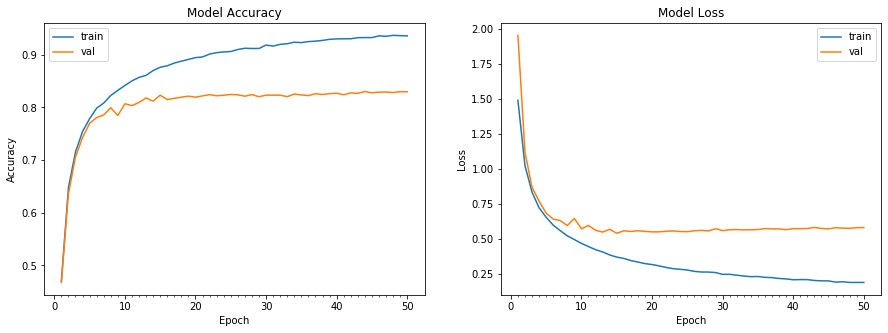

Accuracy on test data is: 82.97


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))